In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('/Users/kirtan/Downloads/food_ingredients_and_allergens.csv')

In [26]:
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains


In [27]:
df.shape

(399, 7)

In [28]:
unique_counts = df.apply(lambda x: len(x.unique()))

In [29]:
unique_counts

Food Product       259
Main Ingredient    101
Sweetener           10
Fat/Oil             36
Seasoning          186
Allergens           40
Prediction           3
dtype: int64

In [30]:
df.isnull().sum()

Food Product       0
Main Ingredient    0
Sweetener          0
Fat/Oil            0
Seasoning          0
Allergens          0
Prediction         1
dtype: int64

In [31]:
df.dropna(inplace=True)

In [32]:
df.isnull().sum()

Food Product       0
Main Ingredient    0
Sweetener          0
Fat/Oil            0
Seasoning          0
Allergens          0
Prediction         0
dtype: int64

# Encoding

# 1. LabelEncoding

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
LE = LabelEncoder()

In [35]:
df['Prediction'] = LE.fit_transform(df['Prediction'])

# 2.Frequency Encoding
->Calculate the frequency of each category in the dataset

->Create a new column with the frequency values for each category


In [36]:
category_counts = df['Food Product'].value_counts()

df['Food Product Freq'] = df['Food Product'].map(category_counts)

In [37]:
category_counts = df['Main Ingredient'].value_counts()

df['Main Ingredient Freq'] = df['Main Ingredient'].map(category_counts)

In [38]:
category_counts = df['Sweetener'].value_counts()

df['Sweetener Freq'] = df['Sweetener'].map(category_counts)

In [39]:
category_counts = df['Fat/Oil'].value_counts()

df['Fat/Oil Freq'] = df['Fat/Oil'].map(category_counts)

In [40]:
category_counts = df['Seasoning'].value_counts()

df['Seasoning Freq'] = df['Seasoning'].map(category_counts)

In [41]:
category_counts = df['Allergens'].value_counts()

df['Allergens Freq'] = df['Allergens'].map(category_counts)

In [42]:
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction,Food Product Freq,Main Ingredient Freq,Sweetener Freq,Fat/Oil Freq,Seasoning Freq,Allergens Freq
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",0,2,2,92,85,11,2
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",0,2,2,92,85,11,2
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",0,4,2,279,58,11,2
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",0,4,2,279,58,11,2
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,0,1,3,279,58,11,83


In [43]:
df.columns

Index(['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning',
       'Allergens', 'Prediction', 'Food Product Freq', 'Main Ingredient Freq',
       'Sweetener Freq', 'Fat/Oil Freq', 'Seasoning Freq', 'Allergens Freq'],
      dtype='object')

In [45]:
df = df.drop(['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning','Allergens'],axis=1)

In [46]:
df.head()

,Prediction,Food Product Freq,Main Ingredient Freq,Sweetener Freq,Fat/Oil Freq,Seasoning Freq,Allergens Freq
0,0,2,2,92,85,11,2
1,0,2,2,92,85,11,2
2,0,4,2,279,58,11,2
3,0,4,2,279,58,11,2
4,0,1,3,279,58,11,83


# Data Visualization

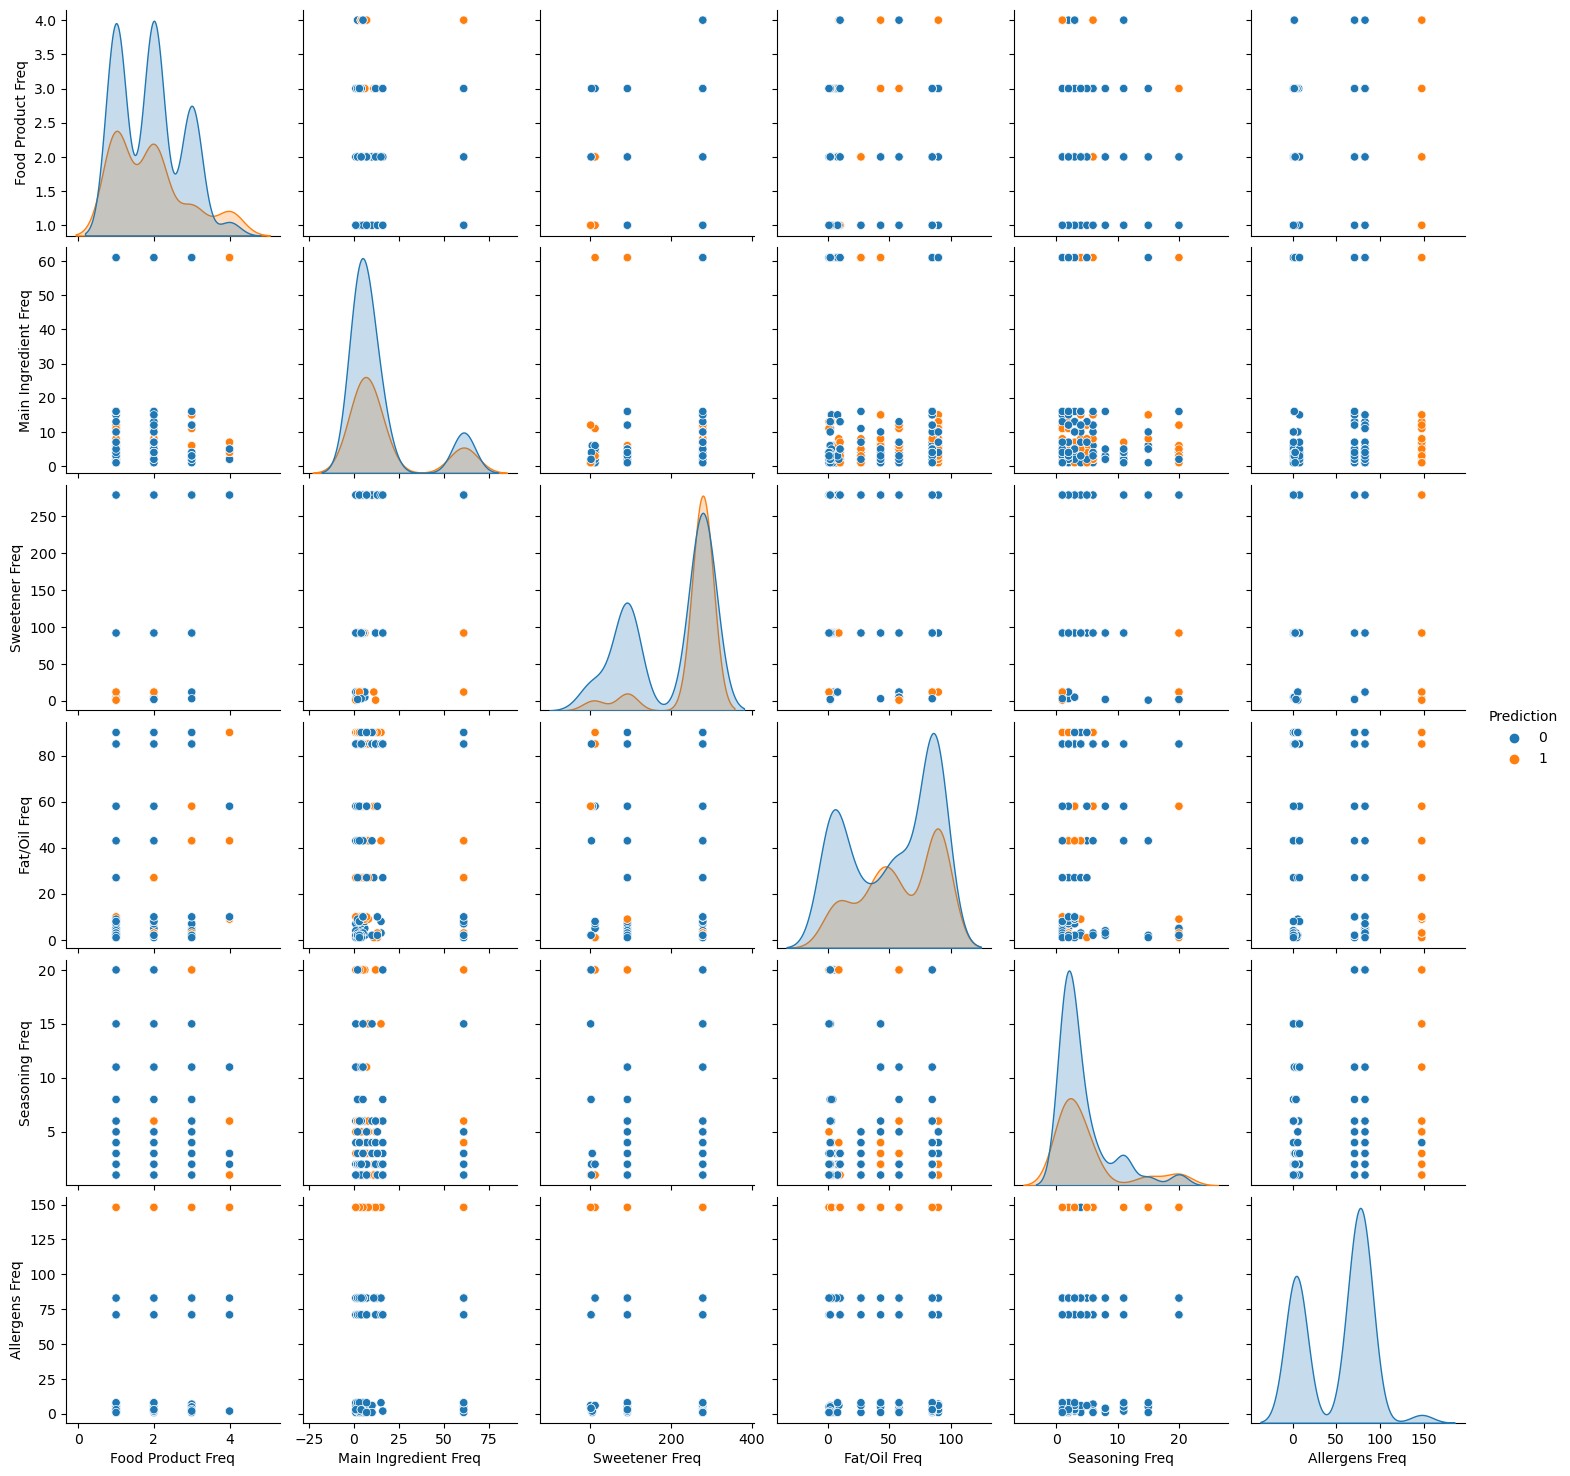

In [55]:
sns.pairplot(df,hue='Prediction')
plt.show()

# HeatMap

In [56]:
Corr = df.corr()

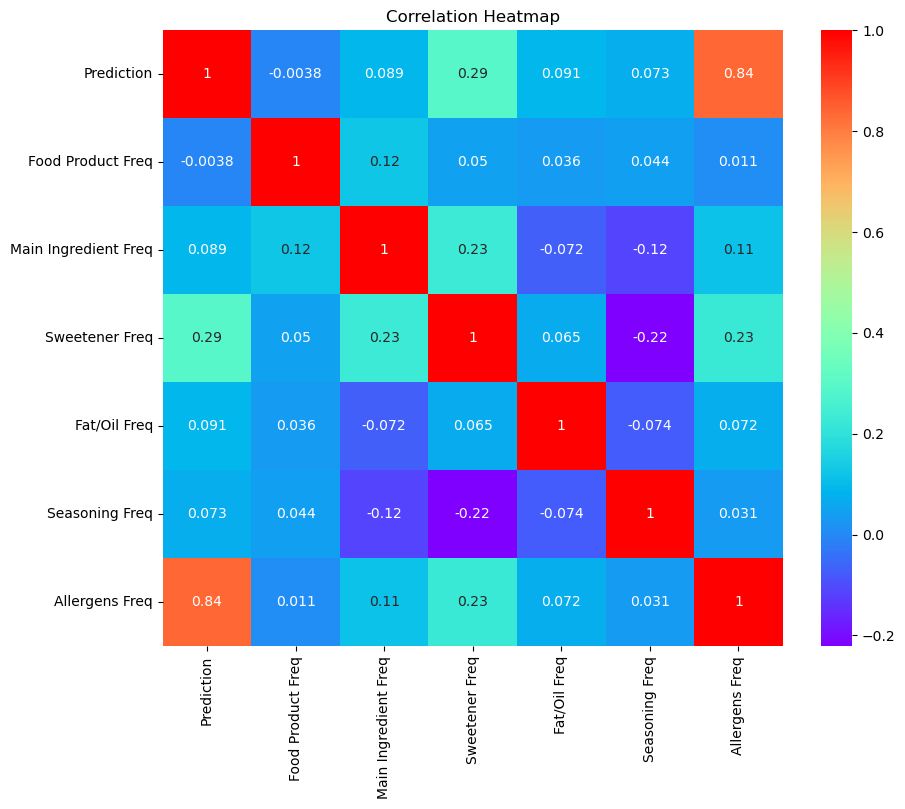

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(Corr, annot=True, cmap='rainbow')
plt.title('Correlation Heatmap')
plt.show()

# Train & Test Split

In [49]:
X = df.iloc[:,1:]
X

,Food Product Freq,Main Ingredient Freq,Sweetener Freq,Fat/Oil Freq,Seasoning Freq,Allergens Freq
0,2,2,92,85,11,2
1,2,2,92,85,11,2
2,4,2,279,58,11,2
3,4,2,279,58,11,2
4,1,3,279,58,11,83
...,...,...,...,...,...,...
394,3,3,92,85,2,2
395,1,1,92,85,1,3
396,2,4,92,85,2,3
397,2,4,92,85,2,3


In [52]:
y = df.iloc[:,:1]
y

,Prediction
0,0
1,0
2,0
3,0
4,0
...,...
394,0
395,0
396,0
397,0


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# DecisionTree & GridSearchCV(Hyperparameter)

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
DT = DecisionTreeClassifier()

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
para = {
    'criterion' : ["gini", "entropy"],
    'max_depth' : range(1,10)
}

In [64]:
Gd = GridSearchCV(DT,param_grid=para,scoring='accuracy',cv=5)

In [65]:
Gd.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10)},
             scoring='accuracy')

In [66]:
Gd.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [67]:
Gd.best_score_

0.9873511904761905

In [69]:
DT = DecisionTreeClassifier(criterion = 'gini',max_depth = 1)

In [70]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

# Prediction

In [71]:
y_hat = DT.predict(X_test)

# Model Score

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [73]:
print(accuracy_score(y_test,y_hat))

0.9875


In [74]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.96      1.00      0.98        22

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.98        80
weighted avg       0.99      0.99      0.99        80



In [75]:
print(confusion_matrix(y_test,y_hat))

[[57  1]
 [ 0 22]]
